In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('IRIS_ Flower_Dataset.csv')

In [3]:
data.shape

(150, 5)

In [4]:
data = data.dropna(axis=0)

In [5]:
data.shape

(150, 5)

In [6]:
a=data.groupby('species')[['sepal_width']].mean()
b=data.groupby('species')[['sepal_length']].mean()
c=data.groupby('species')[['petal_length']].mean()  
d=data.groupby('species')[['petal_width']].mean() 
print(a)
print(b)
print(c)
print(d)

                 sepal_width
species                     
Iris-setosa            3.418
Iris-versicolor        2.770
Iris-virginica         2.974
                 sepal_length
species                      
Iris-setosa             5.006
Iris-versicolor         5.936
Iris-virginica          6.588
                 petal_length
species                      
Iris-setosa             1.464
Iris-versicolor         4.260
Iris-virginica          5.552
                 petal_width
species                     
Iris-setosa            0.244
Iris-versicolor        1.326
Iris-virginica         2.026


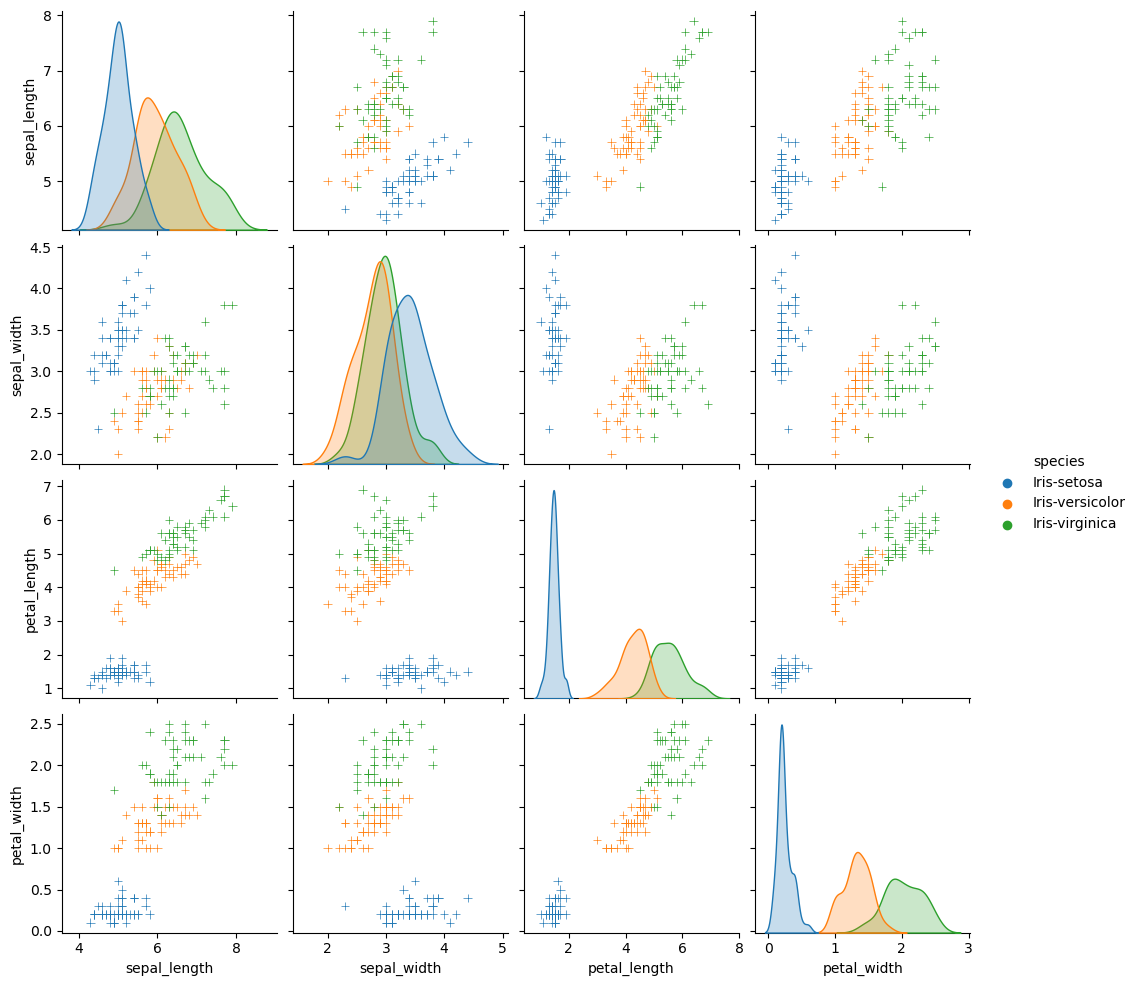

In [7]:
tmp = data
g = sns.pairplot(tmp, hue='species', markers='+')
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

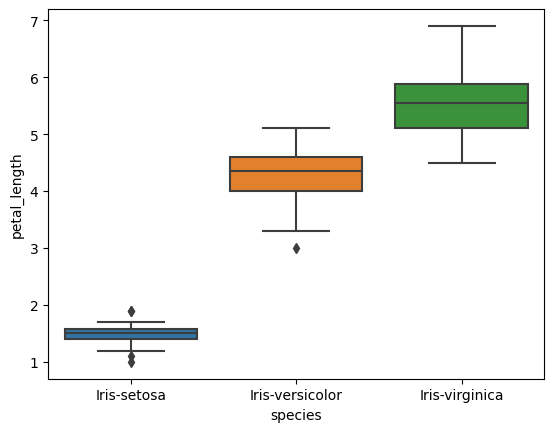

In [8]:
sns.boxplot(x = "species", y = "petal_length", data = data)

<Axes: xlabel='species', ylabel='sepal_length'>

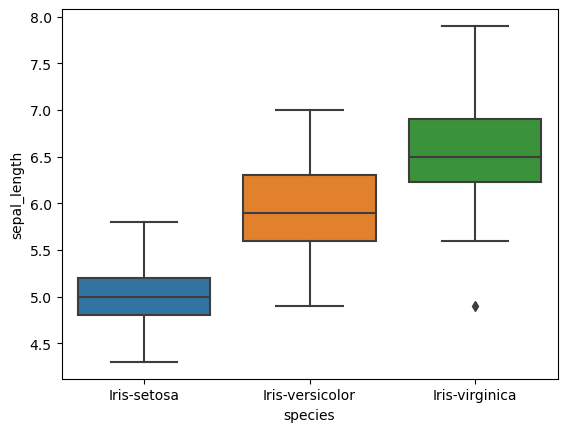

In [9]:
sns.boxplot(x = "species", y = "sepal_length", data = data)

C:\Users\gasni\AppData\Local\Temp\ipykernel_1268\2988023243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


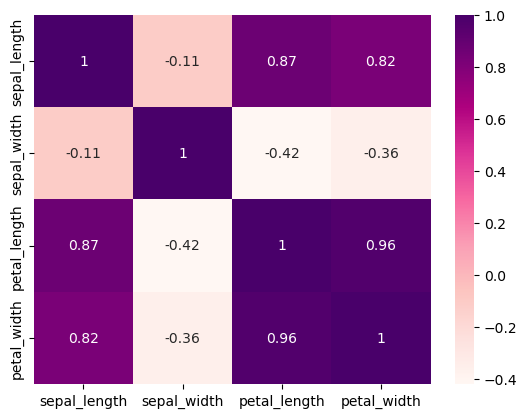

In [10]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='RdPu')
plt.show()


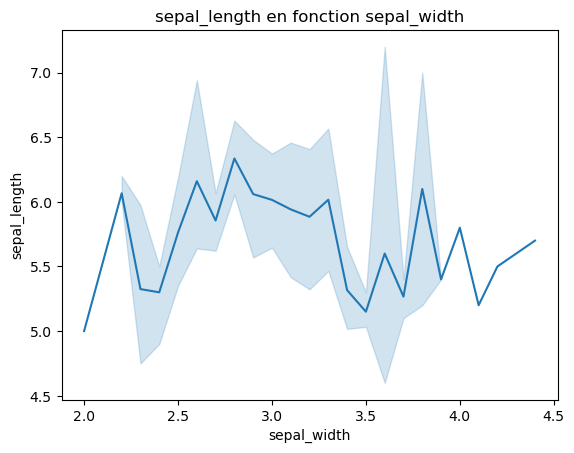

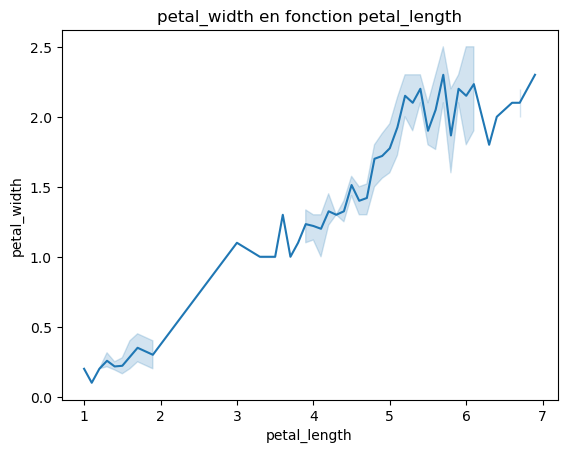

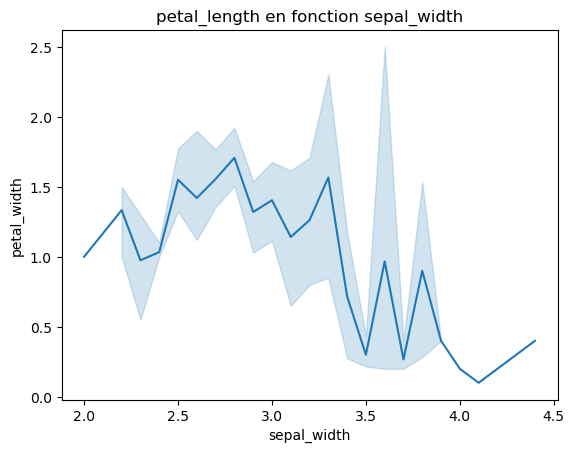

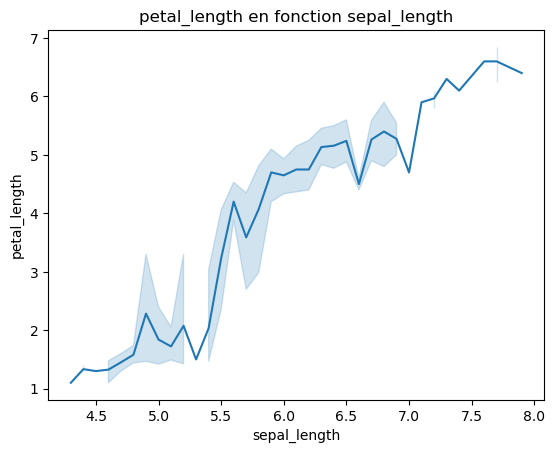

In [11]:
sns.lineplot(x="sepal_width", y="sepal_length", data=data)
plt.title("sepal_length en fonction sepal_width")
plt.show()
sns.lineplot(x="petal_length", y="petal_width", data=data)
plt.title("petal_width en fonction petal_length")
plt.show()

sns.lineplot(x="sepal_width", y="petal_width", data=data)
plt.title("petal_length en fonction sepal_width")
plt.show()


sns.lineplot(x="sepal_length", y="petal_length", data=data)
plt.title("petal_length en fonction sepal_length")
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
data['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)

In [14]:
X = data.drop(['species'], axis=1)
y = data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [16]:
model = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
print('Train score: ', model.score(X_train, y_train))
print('test score: ', model.score(X_test, y_test))

Train score:  1.0
test score:  0.9333333333333333


In [17]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [20]:
pred_rf = model.predict(X_test)
accuracy = accuracy_score(y_test, pred_rf)

print(accuracy)

0.9333333333333333


In [21]:
conf_mat =  confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


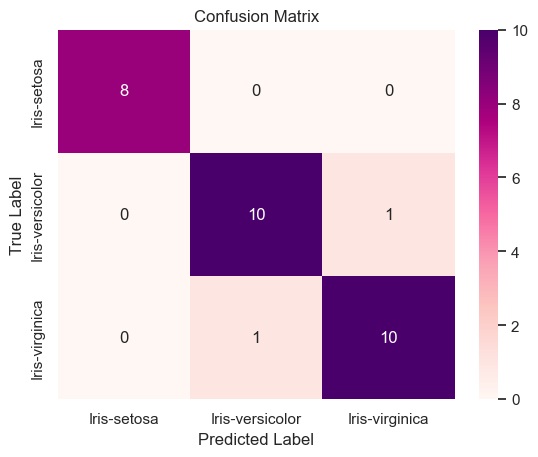

In [22]:
sns.set()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="RdPu", xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
feature_names = X.columns.values.tolist()
print(feature_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [24]:
features = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
features

petal_width     0.473662
petal_length    0.407654
sepal_length    0.102930
sepal_width     0.015754
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


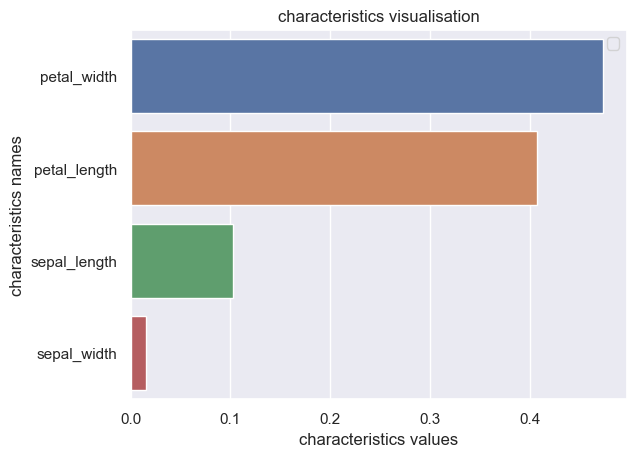

In [25]:
sns.barplot(x=features, y=features.index)
plt.xlabel('characteristics values')
plt.ylabel('characteristics names')
plt.title("characteristics visualisation")
plt.legend()
plt.show()

In [26]:
model_performance = pd.DataFrame({
    "Model": ["Random Forest"],
    "Accuracy": [ accuracy]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
0  Random Forest  0.933333

In [27]:
model = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [29]:
grid_cv = GridSearchCV(model, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=7)

In [30]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(X_train, y_train)
predict_optimal = optimal_model.predict(X_test)
final_accuracy = accuracy_score(y_test, predict_optimal)

In [31]:
print(final_accuracy)

0.9


In [32]:
from sklearn.model_selection import learning_curve

In [33]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)

[ 9 19 28 38 48 57 67 76 86 96]


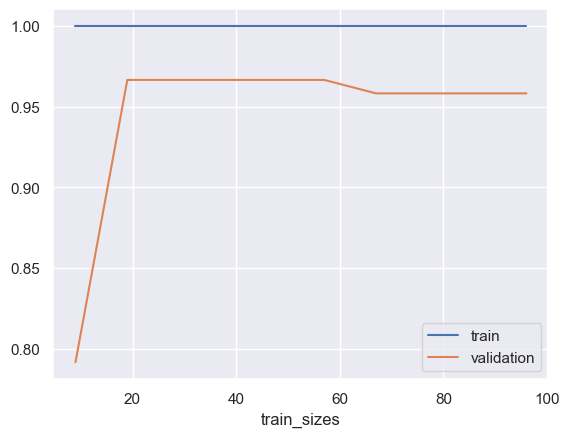

In [34]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [36]:
output = pd.DataFrame({'Survived': predict_optimal})
output.to_csv('submissioniris.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
